# **Tarea Nº 2**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: Braulio Mundaca y Adriana Arce
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours
    b. Flew to Houston (IAH or HOU)
    c. Were operated by United, American, or Southwest
    d. Departed in spring (March, April, and June)
    e. Arrived more than two hours late, but didn’t leave late
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

In [1]:
# Importamos pandas
import pandas as pd

# Lee el archivo de csv y lo almacena en un DataFrame
df = pd.read_csv("C:/Users/51985/Desktop/CICLO/QLAB-PYTHON PARA MACRO Y FINANZAS/tarea-2-adriana-arce-braulio-mundaca/flights.csv")

#Ahora visualizamos la base de datos
df

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [2]:
#Identificar vuelos que: retraso de 3 o más horas.
flights_with_delay = df[df['arr_delay'] >= 180]

#Visualizamos vuelos con retraso
flights_with_delay

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,152,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
649,650,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00
673,674,2013,1,1,1842.0,1422,260.0,1958.0,1535,263.0,EV,4633,N18120,EWR,BTV,46.0,266,14,22,2013-01-01 14:00:00
746,747,2013,1,1,2006.0,1630,216.0,2230.0,1848,222.0,EV,4644,N14972,EWR,SAV,121.0,708,16,30,2013-01-01 16:00:00
801,802,2013,1,1,2115.0,1700,255.0,2330.0,1920,250.0,9E,3347,N924XJ,JFK,CVG,115.0,589,17,0,2013-01-01 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335540,335541,2013,9,29,1745.0,1330,255.0,2028.0,1632,236.0,B6,431,N517JB,LGA,SRQ,137.0,1047,13,30,2013-09-29 13:00:00
335720,335721,2013,9,29,2049.0,1730,199.0,2153.0,1852,181.0,B6,86,N373JB,JFK,ROC,44.0,264,17,30,2013-09-29 17:00:00
335778,335779,2013,9,29,2327.0,1942,225.0,153.0,2250,183.0,B6,1271,N659JB,LGA,FLL,129.0,1076,19,42,2013-09-29 19:00:00
336252,336253,2013,9,30,1324.0,830,294.0,1512.0,1040,272.0,EV,5157,N761ND,LGA,CLT,79.0,544,8,30,2013-09-30 08:00:00


In [3]:
#Identificar vuelos a Houston
vuelos_a_Houston = df[df['dest'].isin(['HOU', 'IAH'])]

#Visualizamos
vuelos_a_Houston

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
32,33,2013,1,1,623.0,627,-4.0,933.0,932,1.0,UA,496,N459UA,LGA,IAH,229.0,1416,6,27,2013-01-01 06:00:00
81,82,2013,1,1,728.0,732,-4.0,1041.0,1038,3.0,UA,473,N488UA,LGA,IAH,238.0,1416,7,32,2013-01-01 07:00:00
89,90,2013,1,1,739.0,739,0.0,1104.0,1038,26.0,UA,1479,N37408,EWR,IAH,249.0,1400,7,39,2013-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336524,336525,2013,9,30,1729.0,1720,9.0,2001.0,2010,-9.0,UA,652,N455UA,EWR,IAH,173.0,1400,17,20,2013-09-30 17:00:00
336527,336528,2013,9,30,1735.0,1715,20.0,2010.0,2005,5.0,WN,2067,N296WN,EWR,HOU,188.0,1411,17,15,2013-09-30 17:00:00
336618,336619,2013,9,30,1859.0,1859,0.0,2134.0,2159,-25.0,UA,1128,N14731,LGA,IAH,180.0,1416,18,59,2013-09-30 18:00:00
336694,336695,2013,9,30,2015.0,2015,0.0,2244.0,2307,-23.0,UA,1545,N17730,EWR,IAH,174.0,1400,20,15,2013-09-30 20:00:00


In [4]:
#Were operated by United, American, or Southwest
aerolineas = df[df['carrier'].isin(['UA', 'AA', 'WN'])]

#Visualizamos
aerolineas

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
5,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
9,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336736,336737,2013,9,30,2104.0,2030,34.0,2205.0,2150,15.0,WN,382,N7741C,LGA,MDW,105.0,725,20,30,2013-09-30 20:00:00
336737,336738,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-09-30 21:00:00
336751,336752,2013,9,30,2140.0,2140,0.0,10.0,40,-30.0,AA,185,N335AA,JFK,LAX,298.0,2475,21,40,2013-09-30 21:00:00
336755,336756,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-09-30 21:00:00


In [5]:
#Identificar vuelos de marzo, april y junio debido a que son los meses a los que se hace referencia en la indicación
marzo_junio= df[df['month'].isin([3, 4, 6])]

#Visualizamos
marzo_junio

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
136247,136248,2013,3,1,4.0,2159,125.0,318.0,56,142.0,B6,11,N706JB,JFK,FLL,166.0,1069,21,59,2013-03-01 21:00:00
136248,136249,2013,3,1,50.0,2358,52.0,526.0,438,48.0,B6,707,N794JB,JFK,SJU,198.0,1598,23,58,2013-03-01 23:00:00
136249,136250,2013,3,1,117.0,2245,152.0,223.0,2354,149.0,B6,608,N328JB,JFK,PWM,48.0,273,22,45,2013-03-01 22:00:00
136250,136251,2013,3,1,454.0,500,-6.0,633.0,648,-15.0,US,1117,N177US,EWR,CLT,79.0,529,5,0,2013-03-01 05:00:00
136251,136252,2013,3,1,505.0,515,-10.0,746.0,810,-24.0,UA,475,N527UA,EWR,IAH,199.0,1400,5,15,2013-03-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250445,250446,2013,6,30,NaN,1945,NaN,NaN,2104,NaN,EV,5714,N836AS,JFK,IAD,NaN,228,19,45,2013-06-30 19:00:00
250446,250447,2013,6,30,NaN,1610,NaN,NaN,1805,NaN,EV,4092,N16147,EWR,DAY,NaN,533,16,10,2013-06-30 16:00:00
250447,250448,2013,6,30,NaN,1709,NaN,NaN,1856,NaN,EV,4662,N16911,EWR,RDU,NaN,416,17,9,2013-06-30 17:00:00
250448,250449,2013,6,30,NaN,2059,NaN,NaN,2307,NaN,EV,5254,N760EV,LGA,DSM,NaN,1031,20,59,2013-06-30 20:00:00


In [6]:
#Identificamos los vuelos que no salieron tarde
no_salieron_tarde=df[df['dep_delay'] <= 0]
no_salieron_tarde
#Una vez filtrados, identificamos los que de este grupo, sí llegaron con más de 2 horas de atraso
pero_llegaron_tarde=no_salieron_tarde[no_salieron_tarde['arr_delay'] > 120]

#Visualizamos
pero_llegaron_tarde

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
22911,22912,2013,1,27,1419.0,1420,-1.0,1754.0,1550,124.0,MQ,3728,N1EAMQ,EWR,ORD,135.0,719,14,20,2013-01-27 14:00:00
33011,33012,2013,10,7,1350.0,1350,0.0,1736.0,1526,130.0,EV,5181,N611QX,LGA,MSN,117.0,812,13,50,2013-10-07 13:00:00
33019,33020,2013,10,7,1357.0,1359,-2.0,1858.0,1654,124.0,AA,1151,N3CMAA,LGA,DFW,192.0,1389,13,59,2013-10-07 13:00:00
41075,41076,2013,10,16,657.0,700,-3.0,1258.0,1056,122.0,B6,3,N703JB,JFK,SJU,225.0,1598,7,0,2013-10-16 07:00:00
55985,55986,2013,11,1,658.0,700,-2.0,1329.0,1015,194.0,VX,399,N629VA,JFK,LAX,336.0,2475,7,0,2013-11-01 07:00:00
152766,152767,2013,3,18,1844.0,1847,-3.0,39.0,2219,140.0,UA,389,N560UA,JFK,SFO,386.0,2586,18,47,2013-03-18 18:00:00
180893,180894,2013,4,17,1635.0,1640,-5.0,2049.0,1845,124.0,MQ,4540,N721MQ,LGA,DTW,130.0,502,16,40,2013-04-17 16:00:00
181270,181271,2013,4,18,558.0,600,-2.0,1149.0,850,179.0,AA,707,N3EXAA,LGA,DFW,234.0,1389,6,0,2013-04-18 06:00:00
181327,181328,2013,4,18,655.0,700,-5.0,1213.0,950,143.0,AA,2083,N565AA,EWR,DFW,230.0,1372,7,0,2013-04-18 07:00:00
213693,213694,2013,5,22,1827.0,1830,-3.0,2217.0,2010,127.0,MQ,4674,N518MQ,LGA,CLE,90.0,419,18,30,2013-05-22 18:00:00


In [7]:
#Identificar vuelos retrasados por al menos una hora y que hayan recuperado al menos 30 minutos de vuelo.
vuelos_retrasados = df[df['dep_delay'] >= 2]
vuelos_que_recuperaron_30_min = vuelos_retrasados[vuelos_retrasados['arr_time'] - vuelos_retrasados['sched_arr_time'] > 30]

#Visualizamos
vuelos_que_recuperaron_30_min

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
69,70,2013,1,1,702.0,700,2.0,1058.0,1014,44.0,B6,671,N779JB,JFK,LAX,381.0,2475,7,0,2013-01-01 07:00:00
73,74,2013,1,1,715.0,713,2.0,911.0,850,21.0,UA,544,N841UA,EWR,ORD,156.0,719,7,13,2013-01-01 07:00:00
85,86,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336742,336743,2013,9,30,2119.0,2005,74.0,2310.0,2212,58.0,EV,4321,N17984,EWR,MCI,147.0,1092,20,5,2013-09-30 20:00:00
336744,336745,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30 21:00:00
336757,336758,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30 18:00:00
336760,336761,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-09-30 20:00:00


In [8]:
vuelos_nocturnos= df[(df['dep_time'] >= 0) & (df['dep_time'] <= 500)]
vuelos_nocturnos

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
842,843,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,707,N580JB,JFK,SJU,189.0,1598,23,59,2013-01-02 23:00:00
843,844,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,22,N636JB,JFK,SYR,49.0,209,22,50,2013-01-02 22:00:00
844,845,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,1030,N162UW,EWR,CLT,108.0,529,5,0,2013-01-02 05:00:00
1785,1786,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,707,N763JB,JFK,SJU,193.0,1598,23,59,2013-01-03 23:00:00
1786,1787,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,104,N329JB,JFK,BUF,58.0,301,21,45,2013-01-03 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331219,331220,2013,9,25,451.0,500,-9.0,636.0,648,-12.0,US,1877,N151UW,EWR,CLT,84.0,529,5,0,2013-09-25 05:00:00
332195,332196,2013,9,26,451.0,500,-9.0,619.0,648,-29.0,US,1877,N155UW,EWR,CLT,72.0,529,5,0,2013-09-26 05:00:00
333191,333192,2013,9,27,453.0,500,-7.0,627.0,648,-21.0,US,1877,N161UW,EWR,CLT,76.0,529,5,0,2013-09-27 05:00:00
334187,334188,2013,9,28,451.0,500,-9.0,627.0,648,-21.0,US,1877,N181UW,EWR,CLT,77.0,529,5,0,2013-09-28 05:00:00


2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [9]:
# Solución
null_count_dep_time = df['dep_time'].isna().sum()

#Visualizamos los vuelos que tienen missing values en dep_time.
null_count_dep_time

8255

In [10]:
#¿Qué otras variables tienen missing values?
Missing_variables = df.isna().sum()
Missing_variables

Unnamed: 0           0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [ ]:
#Las variables que tienen missing son: dep_time, dep_delay, arr_time, tailnum, air_time. Estas filas representan valores que son ceros o que no están registrados.

3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [11]:
# Solution
arr_time_1800 = df[df['arr_time'] == 1800]
arr_time_1800
print(arr_time_1800)
#No aparecen missing values porque no cumplirán con la condición, ya que no albergan ningún valor

        Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
1327          1328  2013      1    2    1442.0            1430       12.0   
1426          1427  2013      1    2    1600.0            1501       59.0   
1433          1434  2013      1    2    1603.0            1517       46.0   
2349          2350  2013      1    3    1602.0            1600        2.0   
3333          3334  2013      1    4    1658.0            1705       -7.0   
...            ...   ...    ...  ...       ...             ...        ...   
334637      334638  2013      9   28    1530.0            1535       -5.0   
334656      334657  2013      9   28    1555.0            1600       -5.0   
334707      334708  2013      9   28    1651.0            1635       16.0   
336376      336377  2013      9   30    1521.0            1521        0.0   
336464      336465  2013      9   30    1643.0            1629       14.0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin 

4. What does `False & None` evaluate to? Why?

In [12]:
# Solution
#Reconocen los booleans que tienen el valor de 0 y los None son valores que no son missing values pero sí abarcan un valor

## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [13]:
# Solution
#Hay distintas maneras de hacerlo por ejemplo usando corchetes y el nombre de las columnas
variables1 = df[['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]
variables1

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


In [14]:
#Usando loc
variables2 = df.loc[:, ['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]
variables2

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


In [15]:
#Usando el indices de sus columnas
variables3 = df.iloc[:, [4, 6, 7, 9]]
variables3

,dep_time,dep_delay,arr_time,arr_delay
0,517.0,2.0,830.0,11.0
1,533.0,4.0,850.0,20.0
2,542.0,2.0,923.0,33.0
3,544.0,-1.0,1004.0,-18.0
4,554.0,-6.0,812.0,-25.0
...,...,...,...,...
336771,NaN,NaN,NaN,NaN
336772,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN


## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [16]:
# Solution
most_delayed_flight=df.sort_values( ["arr_time"] , ascending = False)
most_delayed_flight. head(1)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
244603,244604,2013,6,24,2246.0,1859,227.0,2400.0,2026,214.0,EV,4131,N11150,EWR,RIC,48.0,277,18,59,2013-06-24 18:00:00


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [17]:
# Solucion
earliest_flights_ever=df.sort_values( ["dep_delay"] , ascending = True)[['tailnum', 'time_hour','dep_delay']]
earliest_flights_ever.head(5)

,tailnum,time_hour,dep_delay
89673,N592JB,2013-12-07 21:00:00,-43.0
113633,N612DL,2013-02-03 20:00:00,-33.0
64501,N825AS,2013-11-10 14:00:00,-32.0
9619,N934DL,2013-01-11 19:00:00,-30.0
24915,N208FR,2013-01-29 17:00:00,-27.0


In [ ]:
8. How could you sort all missing values to the start? 

In [18]:
# Solution
df = df.sort_values(by=list(df.columns), ascending=False)
df

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336775,336776,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00


## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [19]:
# Solution
df['dep_time_min'] = (df['dep_time'] // 100) * 60 + (df['dep_time'] % 100)
df['arr_time_min'] = (df['arr_time'] // 100) * 60 + (df['arr_time'] % 100)

df

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_time_min,arr_time_min
336775,336776,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,NaN,NaN
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,NaN,NaN
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,NaN,NaN
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,NaN,NaN
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,354.0,492.0
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,344.0,604.0
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,342.0,563.0
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,333.0,530.0


10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

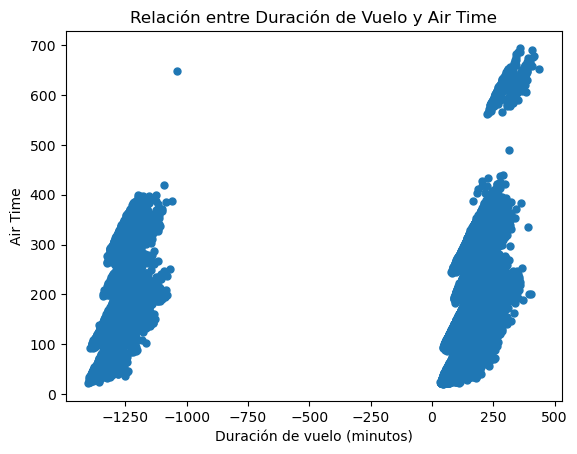

In [23]:
# Solution
import matplotlib.pyplot as plt
df['duracion_de_vuelo_min'] = df['arr_time_min'] - df['dep_time_min']
df
plt.plot(df['duracion_de_vuelo_min'], df['air_time'], '.', markersize=10, label='Datos')
plt.xlabel('Duración de vuelo (minutos)')
plt.ylabel('Air Time')
plt.title('Relación entre Duración de Vuelo y Air Time')
plt.show()

11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

In [21]:
# Solution
#Esto puede deberse al hecho de que hay algunos datos que son missing values en alguna de las 3 variables 
#creadas que esté afectando el grafico de dispersion
#Por otro lado, también puede ser el caso de que se manejen distintas zonas horarias que hacen que las diferencias
#sean negativas y eso afecta el grafico

12. Implement your fix to the major probelm. Remake the plot from the previous question.

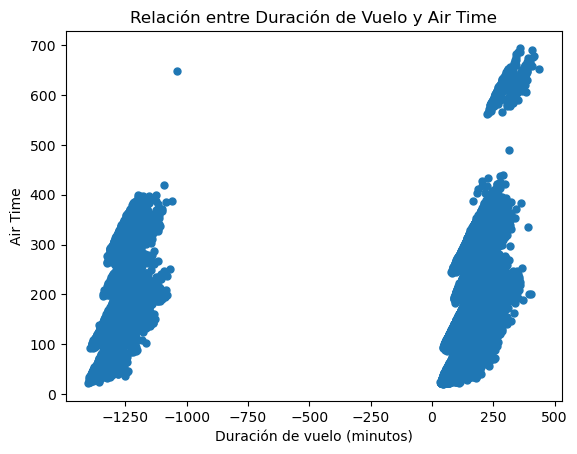

In [24]:
# Solution
df['new_air_time'] = df['air_time'].dropna()
df['new_duracion_de_vuelo_min'] = df['duracion_de_vuelo_min'].dropna()
plt.plot(df['new_duracion_de_vuelo_min'], df['new_air_time'], '.', markersize=10, label='Datos')
plt.xlabel('Duración de vuelo (minutos)')
plt.ylabel('Air Time')
plt.title('Relación entre Duración de Vuelo y Air Time')
plt.show()
#El error persiste, es porque la variable "air_time" puede no ser exactamente el cálculo entre la hora de salida y de llegada del vuelo y por eso difiere
#de la variable que se calculo

13. Find the 10 most delayed flights 

In [25]:
# Solution
earliest_flights_ever=df.sort_values( ["dep_delay"] , ascending = False)
earliest_flights_ever.head(10)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,air_time,distance,hour,minute,time_hour,dep_time_min,arr_time_min,duracion_de_vuelo_min,new_air_time,new_duracion_de_vuelo_min
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,...,640.0,4983,9,0,2013-01-09 09:00:00,401.0,762.0,361.0,640.0,361.0
235778,235779,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,...,74.0,483,19,35,2013-06-15 19:00:00,872.0,967.0,95.0,74.0,95.0
8239,8240,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,...,111.0,719,16,35,2013-01-10 16:00:00,681.0,759.0,78.0,111.0,78.0
327043,327044,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,...,354.0,2586,18,45,2013-09-20 18:00:00,699.0,897.0,198.0,354.0,198.0
270376,270377,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,...,96.0,589,16,0,2013-07-22 16:00:00,525.0,644.0,119.0,96.0,119.0
173992,173993,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,...,139.0,1005,19,0,2013-04-10 19:00:00,660.0,822.0,162.0,139.0,162.0
151974,151975,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,...,167.0,1020,8,10,2013-03-17 08:00:00,1401.0,95.0,-1306.0,167.0,-1306.0
247040,247041,2013,6,27,959.0,1900,899.0,1236.0,2226,850.0,...,313.0,2454,19,0,2013-06-27 19:00:00,599.0,756.0,157.0,313.0,157.0
270987,270988,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,...,109.0,762,7,59,2013-07-22 07:00:00,1377.0,81.0,-1296.0,109.0,-1296.0
87238,87239,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,...,149.0,1085,17,0,2013-12-05 17:00:00,476.0,658.0,182.0,149.0,182.0


## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [26]:
# Solution
# Filtramos los vuelos que se originan en NYC, es decir, aquellos vuelos que provienen de los siguientes aeropuertos: JFK, EWR y LGA
df_nyc = df[df['origin'].isin(['JFK', 'EWR', 'LGA'])]
df_nyc

# Calculamos los retrasos promedio por destino
average_delays = (df_nyc.groupby('dest')['dep_delay'].mean() + df_nyc.groupby('dest')['arr_delay'].mean()) / 2

# Creamos una variable que clasifica los destinos de peor a mejor
average_delays = average_delays.sort_values(ascending=False)
top_10_delays = average_delays.nlargest(10)
ranking = top_10_delays.rank(method='max', ascending=False)
df_ranking = pd.DataFrame({'Delay': top_10_delays, 'Ranking': ranking})
ranking

dest
CAE     1.0
TUL     2.0
OKC     3.0
JAC     4.0
TYS     5.0
BHM     6.0
DSM     7.0
MSN     8.0
RIC     9.0
CAK    10.0
dtype: float64

15. Which plane (`tailnum`) has the most minutes of delays total?

In [27]:
# Solution
average_delays_minutes = (df_nyc.groupby('tailnum')['dep_delay'].mean() + df_nyc.groupby('tailnum')['arr_delay'].mean()) / 2
average_delays_minutes = average_delays_minutes.sort_values(ascending=False)
average_delays_minutes.head(1)

tailnum
N844MH    308.5
dtype: float64

16. Which airlines only offer flights from New York to one other airport?

In [28]:
# Solution
df_nyc #recogemos la base de datos de los vuelos que se originan en NYC, es decir, aquellos vuelos que provienen de los siguientes aeropuertos: JFK, EWR y LGA
df_nyc_duplicated=[df_nyc.loc[:, ['carrier']].duplicated( keep=False)]
df_nyc = df_nyc.drop_duplicates(subset=['carrier'])
carrier_list = df_nyc['carrier'].tolist()
carrier_list

['MQ',
 '9E',
 'EV',
 'B6',
 'UA',
 'AA',
 'DL',
 'WN',
 'US',
 'FL',
 'VX',
 'YV',
 'AS',
 'F9',
 'HA',
 'OO']

17. Calculate the median arrival delay by airline.

In [29]:
# Solution
mediana_retraso_por_aerolinea = df.groupby('carrier')['arr_delay'].median()
print(mediana_retraso_por_aerolinea)

carrier
9E    -7.0
AA    -9.0
AS   -17.0
B6    -3.0
DL    -8.0
EV    -1.0
F9     6.0
FL     5.0
HA   -13.0
MQ    -1.0
OO    -7.0
UA    -6.0
US    -6.0
VX    -9.0
WN    -3.0
YV    -2.0
Name: arr_delay, dtype: float64


18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


In [30]:
#Solution
#Respuesta: Sí, US airways es mucho más confiable que ExpressJet. Esto se debe a que en términos de retrasos en la llegada, US airways se caracteriza por no tenerlos, al contrario, llega más rápido de lo esperado. Sin embargo, esta respuesta se fundamenta únicamente en términos de retrasos, mas no en términos de seguridad ni eficacia en su servicio, como la cancelación de vuelos o mala calidad de asientos.

19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

In [31]:
# Solution
#Una medida útil puede ser volver a usar la media por retrasos de vuelo. Otra medida podría la desviación estándar. Por otro lado, puede medirse a través
#de percentiles, como también a través de un histograma. Otra forma de poder medirla, pero sin mucha utilidad estadística, podría ser la moda

20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [32]:
# Solution
# Calculamos las medidas de retraso por separado para cada aerolínea
average_dep_delay = df.groupby('carrier')['dep_delay'].mean()
average_arr_delay = df.groupby('carrier')['arr_delay'].mean()

# Creamos un DataFrame con los resultados
df_delays = pd.DataFrame({'Average Departure Delay': average_dep_delay, 'Average Arrival Delay': average_arr_delay})

# Ordenamos el DataFrame por las dos columnas para ver qué aerolíneas tienen un rendimiento deficiente en ambas métricas
df_delays = df_delays.sort_values(by=['Average Departure Delay', 'Average Arrival Delay'], ascending=False)

print(df_delays)
#Respuesta a la pregunta: Las aerolineas que aparentemente rinden poco son F9, EV y YV, presentando altos valores en ambos delays.


         Average Departure Delay  Average Arrival Delay
carrier                                                
F9                     20.215543              21.920705
EV                     19.955390              15.796431
YV                     18.996330              15.556985
FL                     18.726075              20.115906
WN                     17.711744               9.649120
9E                     16.725769               7.379669
B6                     13.022522               9.457973
VX                     12.869421               1.764464
OO                     12.586207              11.931034
UA                     12.106073               3.558011
MQ                     10.552041              10.774733
DL                      9.264505               1.644341
AA                      8.586016               0.364291
AS                      5.804775              -9.930889
HA                      4.900585              -6.915205
US                      3.782418               2